In [6]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

### Chapter 3: Market Stylized Facts

##### 3.2 Volatility and Correlation
###### Volatility
* Volatility as central notion in risk management
* Undirected dispersion/risk measure
* historical volatility: standard deviation of log-returns of financial time series
* instantaneous volatility: volatility factor of diffusion process
* implied volatility: Volatility that if used in option pricing formula will give the market observed price of option
* Skewness: location of sample values wrt to the mean
* Kurtosis: measure for the peakedness of the distribution and size of tails

###### Correlation
* Historical Correlation: co-movement of two time-series
* Instantaneous Correlation: Correlation between two brownian motion (quadratic variation) processes

#### Brownian motion models
* Discrete version of the Brownian motion model
* $S_t$ = $S_{t - \Delta t}e^{(r - \frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t z_t}}$
* $z_t$ are normally distributed random variables
* for _t_ discrete time steps

In [1]:
%run 03_stf/GBM_returns.py

In [2]:
gbm = simulate_gbm()

### Simulated index levles and daily log returns

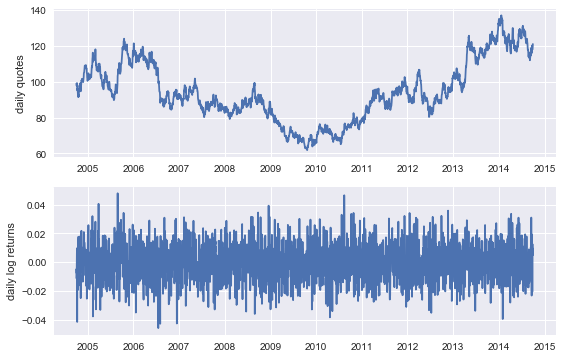

In [8]:
quotes_returns(gbm)

* We can see that simulated daily returns follows a normal distribution

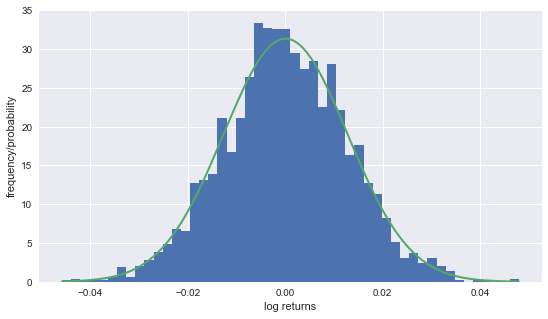

In [10]:
return_histogram(gbm)

* We can also use a qq-plot of the normal distribution to test normality

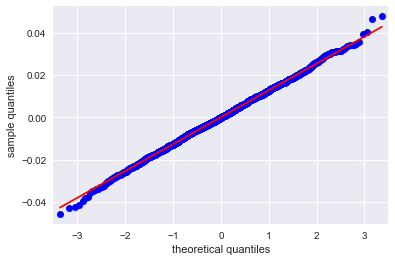

In [13]:
return_qqplot(gbm);


In [14]:
print_statistics(gbm)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000073
Mean of Annua. Log Returns  0.018422
Std  of Annua. Log Returns  0.201944
---------------------------------------------
Skew of Sample Log Returns -0.016447
Skew Normal Test p-value    0.730950
---------------------------------------------
Kurt of Sample Log Returns  0.120578
Kurt Normal Test p-value    0.206628
---------------------------------------------
Normal Test p-value         0.424617
---------------------------------------------
Realized Volatility         0.201947
Realized Variance           0.040783


### Commentary on simulated BSM price data
* Using `scipy.stats` we can run a battery of statistical tests
    * `scipy.stats.skewtest`
    * `scipy.stats.kurtosistest`
    * `scipy.stats.normaltest`
* Standard deviation ~ the parameterized instantaneous volatility value of 0.2
* Skewness is almost 0, high p-value of normal skewness indicates distribution of the log returns is normal
* Kurtosis is slightly positive and p-value of normal kurtosis p-value indicates its normally distributed
* Of course we'd expect all of this since we parameterized our data from a normal distribution
* Realized volatility moves through time as a function observed values
    * If normal process than realized volatility will converge
    * If fat-tailed then realized volatility will not be stationary
* Examining the rolling (252d) statistics
    * volatility moves around the 20% range


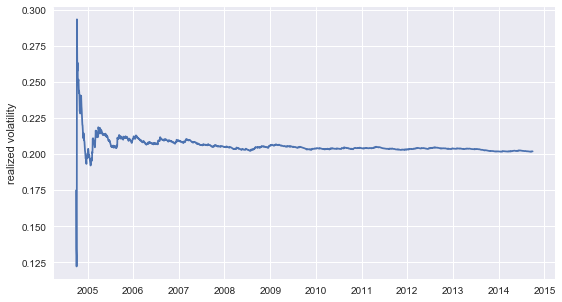

In [15]:
realized_volatility(gbm)


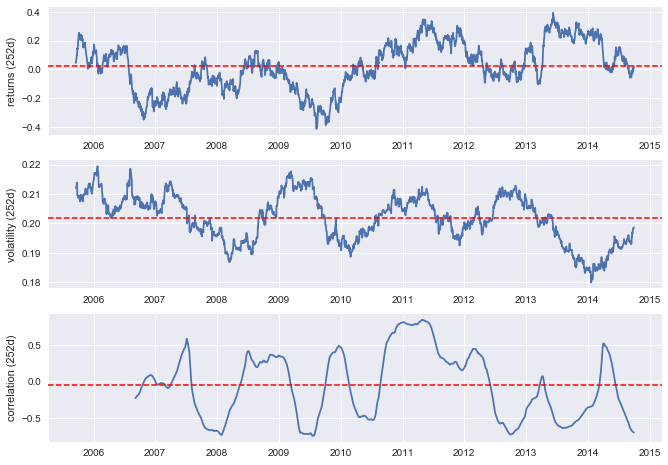

In [16]:
rolling_statistics(gbm)


#### 3.4 Indices and Stocks
* Comparing models vs data reveals stylized facts that are not consistent with models
* Stochastic volatility: neither constant nor deterministic, no method to forecast vol with confidence
* Volatility clustering: High vol events cluster in time, positive autocorrelation
* Mean Reversion: Never goes to 0 never goes to infinity but can change through time
* Leverage affect: Inverse relationship with returns and volatility
* Fat tails: Large positive and negative index returns are more frequent
* Jumps: Index level shifts of orders of magnitude not explained by gaussian process


### DAX index 

In [17]:
%run 03_stf/DAX_returns.py

In [18]:
DAX = read_dax_data()

In [19]:
print_statistics(DAX)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily  Log Returns  0.000254
Mean of Annua. Log Returns  0.063987
Std  of Annua. Log Returns  0.218582
---------------------------------------------
Skew of Sample Log Returns  0.036871
Skew Normal Test p-value    0.449487
---------------------------------------------
Kurt of Sample Log Returns  7.300400
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------
Realized Volatility         0.214515
Realized Variance           0.046017


In [20]:
DAX[['index', 'returns', 'rea_var', 'rea_vol']].tail()

,index,returns,rea_var,rea_vol
Date,,,,
2014-09-24,9661.97,0.006952,0.046055,0.214604
2014-09-25,9510.01,-0.015853,0.046061,0.214619
2014-09-26,9490.55,-0.002048,0.046044,0.214579
2014-09-29,9422.91,-0.007153,0.046031,0.214549
2014-09-30,9474.30,0.005439,0.046017,0.214515


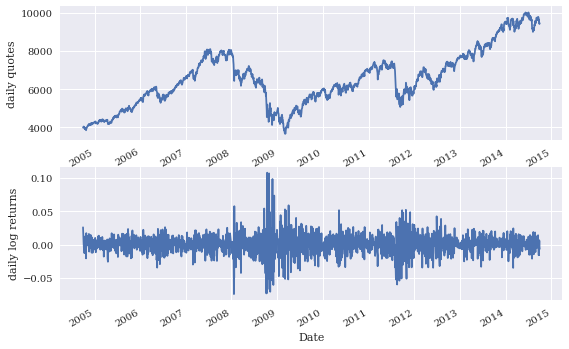

In [21]:
quotes_returns(DAX)


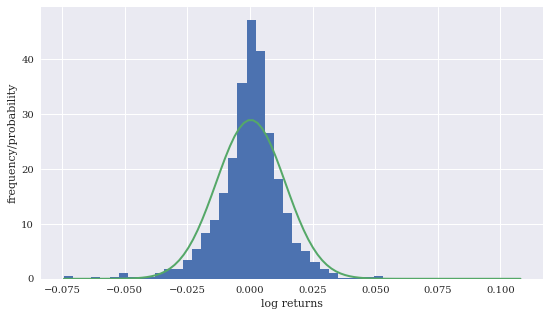

In [22]:
return_histogram(DAX)


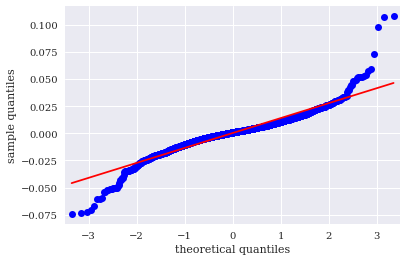

In [23]:
return_qqplot(DAX)


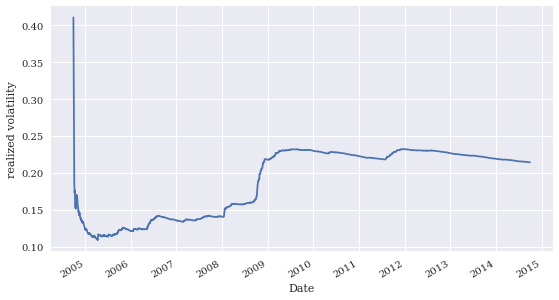

In [24]:
realized_volatility(DAX)


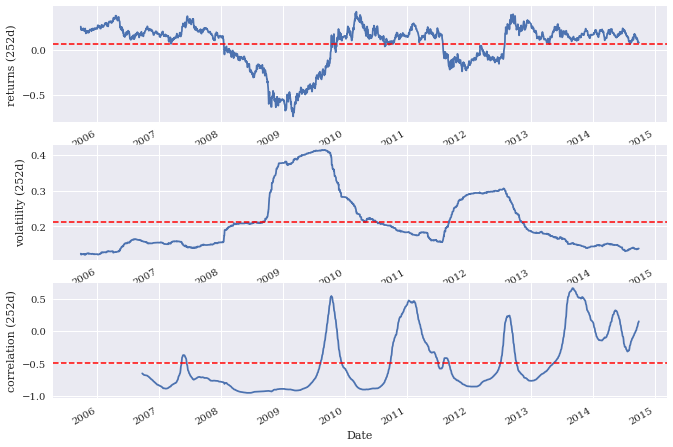

In [25]:
rolling_statistics(DAX)


In [26]:
count_jumps(DAX, 0.05)

32

#### Commentary from empirical DAX index data
* The volatility of the returns changes through time and clusters in certain moments of time
* The Histogram indicates more peakedness and fatter tails
* There is no skewness to the data
* QQ plot indicates a distribution that deviates from normal
* Realized volatility does not converge
* Rolling volatility ranges from 11% to 40%
* Absolute deviations from peak to trough and deviations from mean are greater than a normal distribution
* The returns and volatility are negative correlated, sometimes dangerously so up to -1.0
* Jumps we have 32 days where returns are greater +- 5%. For a normal distribution, you'd expect 0

### Model meets reality
* If you wanted to model DAX you need:
    * autocorrelated stochastic volatility
    * mean-reverting volatility
    * negative correlation between returns and volatility
    * fat tails and jumps in the index returns

### 3.5 Option markets 
#### 3.5.1 Bid-Ask Spread
* Bid: Price option users will buy the instrument
* Ask: Price market makers will sell the instrument
* Examining bid/ask spreads for stocks in DJIA 
    * 1996 -2010
    * 1.1 million options
    * Avg spread 0.227USD, 7.92% relative to the mid-price
    % Values vary with maturity and moneyness of option
    * OTM with short-maturity have smallest absolute spread
    * ITM, long maturity have smallest relative spread
* Market based valuations of less than 1% are unrealistic
* Some markets do not quote bid-ask spreads in increments of less than 0.05USD

#### 3.5.2 Implied Volatility Surface
* Implied volatility for a European option is the volatility that solves the BSM equation given a market observed price
* Volatility surface is the implied volatilities for different option strikes and different option maturities
* Volatility Smiles: For calls the OTM implied vol is higher than ATM and ITM 
    * This has been true since the 1987 crash
* Term Structure: Smiles are more prononunced for short-term optoins than long-term options

In [27]:
%run 03_stf/ES50_imp_vol.py

In [28]:
mats = sorted(set(data['Maturity']))

* We can see the maturities go from monthly to quarter to twice a year

In [29]:
pd.DatetimeIndex(mats)

DatetimeIndex(['2014-10-17', '2014-11-21', '2014-12-19', '2015-03-20',
               '2015-06-19', '2015-09-18', '2015-12-18', '2016-06-17',
               '2016-12-16'],
              dtype='datetime64[ns]', freq=None)

In [30]:
data['Date'] = pd.DatetimeIndex(data['Date'])
data['Maturity'] = pd.DatetimeIndex(data['Maturity'])

In [31]:
data.tail()

,Date,Strike,Call,Maturity,Put
498,2014-09-30,3750.0,27.4,2015-09-18,635.9
499,2014-09-30,3800.0,21.8,2015-09-18,680.3
500,2014-09-30,3850.0,17.2,2015-09-18,725.7
501,2014-09-30,3900.0,13.4,2015-09-18,772.0
502,2014-09-30,3950.0,10.4,2015-09-18,818.9


In [37]:
tolerance = 0.3
S0 = es['SX5E']['30-09-2014']

def _calculate_imp_vols(data, tolerance, S0):
    ''' Calculate all implied volatilities for the European call options
    given the tolerance level for moneyness of the option.'''
    data['Imp_Vol'] = 0.0
    tol = tolerance # tolerance for moneyness
    for row in data.index:
        t = data['Date'][row]
        T = data['Maturity'][row]
        ttm = (T - t).days / 365.
        forward = np.exp(r * ttm) * S0
        if (abs(data['Strike'][row] - forward) / forward) < tol:
            call = call_option(S0, data['Strike'][row], t, T, r, 0.2)
            data.loc[row, 'Imp_Vol'] = call.imp_vol(data.loc[row, 'Call'])
    return data

In [32]:
data = calculate_imp_vols(data)

In [33]:
data.tail()

,Date,Strike,Call,Maturity,Put,Imp_Vol
498,2014-09-30,3750.0,27.4,2015-09-18,635.9,0.159867
499,2014-09-30,3800.0,21.8,2015-09-18,680.3,0.157629
500,2014-09-30,3850.0,17.2,2015-09-18,725.7,0.155544
501,2014-09-30,3900.0,13.4,2015-09-18,772.0,0.153457
502,2014-09-30,3950.0,10.4,2015-09-18,818.9,0.151657


### Implied volatilities for European Call options for EURO Stoxx 50 from 30 Sep 2014

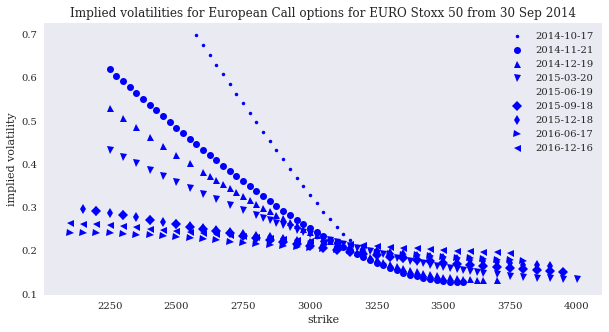

In [39]:
plot_imp_vols(data)
plt.title('Implied volatilities for European Call options for EURO Stoxx 50 from 30 Sep 2014');

#### Short Rates
* Short rates are critical for pricing of all assets
* Nominal interest rates are positive, in general, although we now have sustained evidence of negative interest rates
* No means to accurately forecast these methods with high confidence
* Short rates are mean reverting
* Term structure differences: Yields vary with time to maturity



In [40]:
%run 03_stf/EURIBOR_analysis.py

In [42]:
EBO = read_euribor_data()

/Users/justinsimcock/code/dawp/python36/03_stf/EURIBOR_analysis.py:20: RuntimeWarning: invalid value encountered in log
  EBO['returns'] = np.log(EBO['1w'] / EBO['1w'].shift(1))


In [44]:
EBO.tail()

,1w,2w,1m,2m,3m,6m,9m,12m,returns
2014-09-22,-0.016,-0.012,0.005,0.044,0.082,0.186,0.257,0.345,-0.362905
2014-09-23,-0.014,-0.012,0.005,0.042,0.082,0.185,0.257,0.343,-0.133531
2014-09-24,-0.006,-0.005,0.007,0.043,0.083,0.186,0.257,0.344,-0.847298
2014-09-25,-0.007,-0.006,0.006,0.042,0.082,0.183,0.254,0.342,0.154151
2014-09-30,-0.013,-0.013,0.007,0.043,0.083,0.183,0.251,0.338,0.367725


####  Commentary from Euribor options
* Volatility clustering and outlier events
* Very peaked data for returns
* QQ plot indicates some return values are outliers as well
* Plotting the different maturities through time we see 
    * periods when longer horizons have higher rates  
    * Periods of inverted term structure with shorter maturities at higher rates
    * Widening of rates/steepening of curve



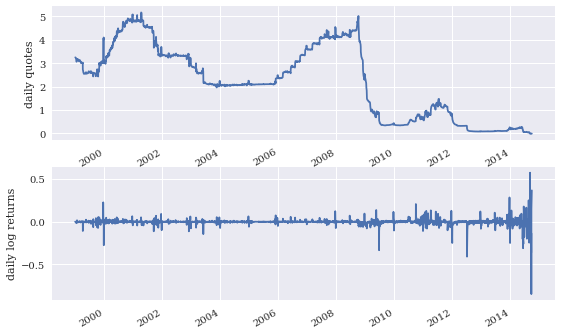

In [45]:
quotes_returns(EBO.rename(columns={'1w' : 'index'}))


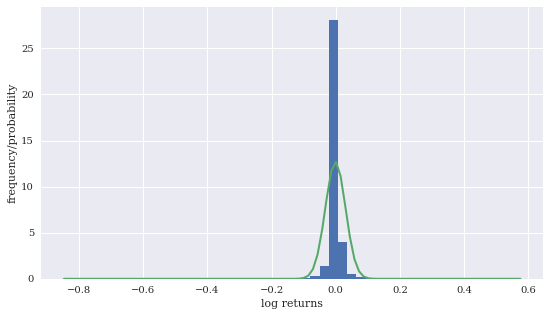

In [46]:
return_histogram(EBO)


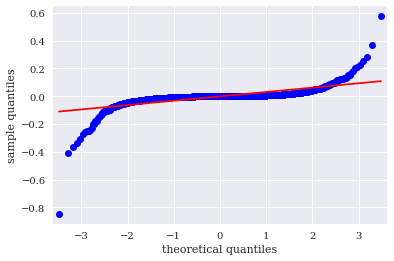

In [47]:
return_qqplot(EBO)


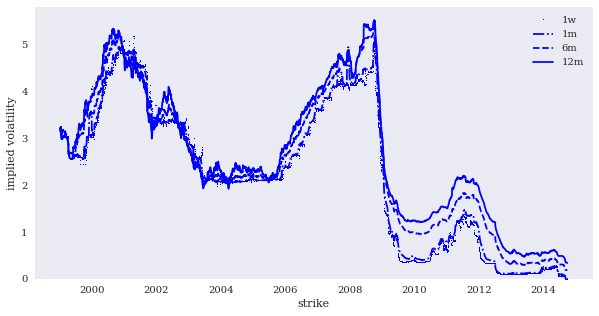

In [48]:
plot_term_structure(EBO)


### Conclusions
* Realistic Market model must address market volatility
    * Volatility varies over time
        * Stochastic, mean-reverting, autocorrelated
    * Negatively correlated with returns (leverage effect)
    * Varies for different maturities (volatility term structure)
* Must also account for jumps in index levels
* Must account for interest rate behavior
    * varies over time (positivity, stochasticity, mean-reverting)
    * vary for different time horizons

* Market model must include
    * Stochastic vol component
    * jump component
    * Stochastic short rate component